In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn as skl 
import matplotlib as plt
from pandas_profiling import ProfileReport
import sweetviz as sv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pycaret


In [4]:
data =  pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data['RainTomorrow'].unique()



array(['No', 'Yes', nan], dtype=object)

In [6]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

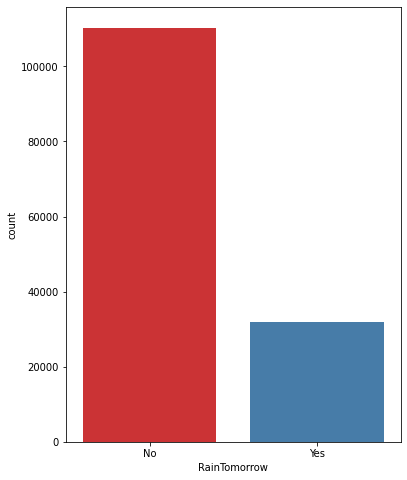

In [10]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")
plt.show()



Text(0, 0.5, 'RainTomorrow')

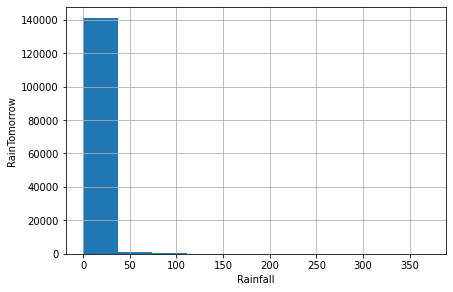

In [12]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')



Text(0, 0.5, 'RainTomorrow')

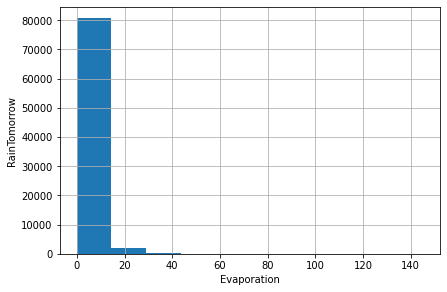

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')




Text(0, 0.5, 'RainTomorrow')

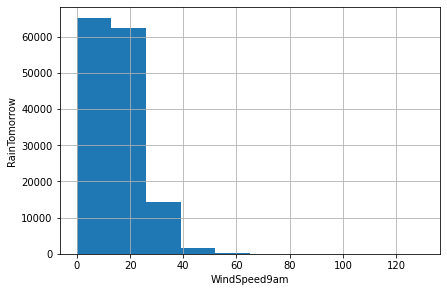

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')




Text(0, 0.5, 'RainTomorrow')

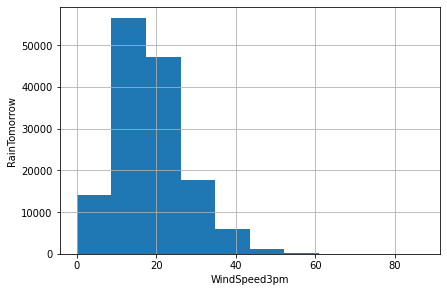

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [5]:

data['WindGustDir'].value_counts()
data = data.dropna(subset=['RainTomorrow'])

In [19]:
correlation = data.corr()

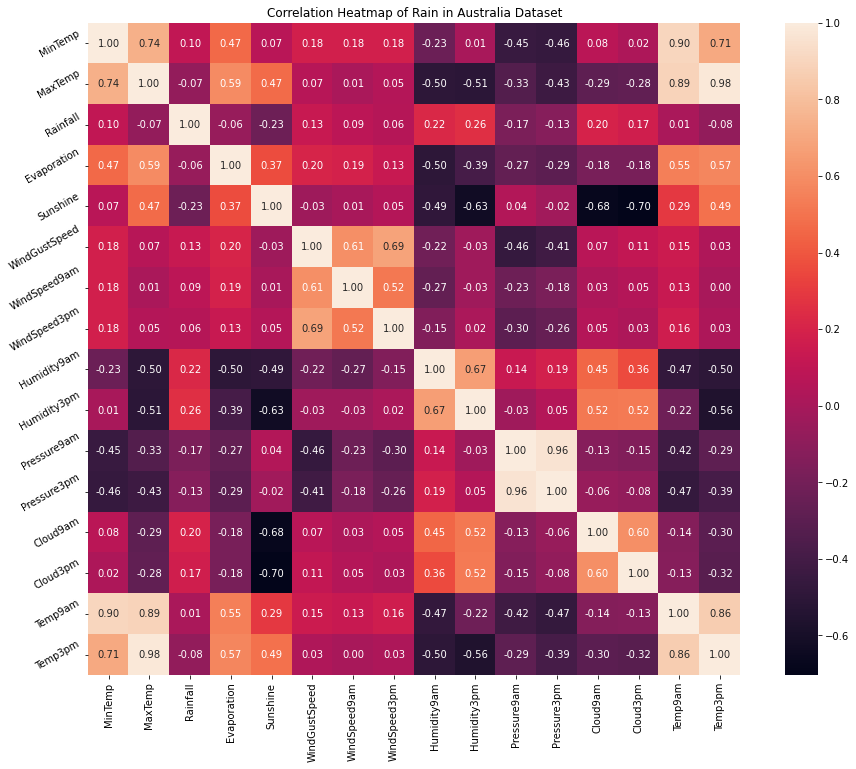

In [20]:


plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [174]:
print('Before')
print(data['RainTomorrow'].isna().sum())

Before
0


In [172]:
data = data.dropna(subset=['RainTomorrow'])

In [175]:
print('After')
data['RainTomorrow'].isna().sum()

After


0

In [15]:
data  = data.drop(['Date'], axis = 1)

In [16]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [17]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [19]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989


<AxesSubplot:>

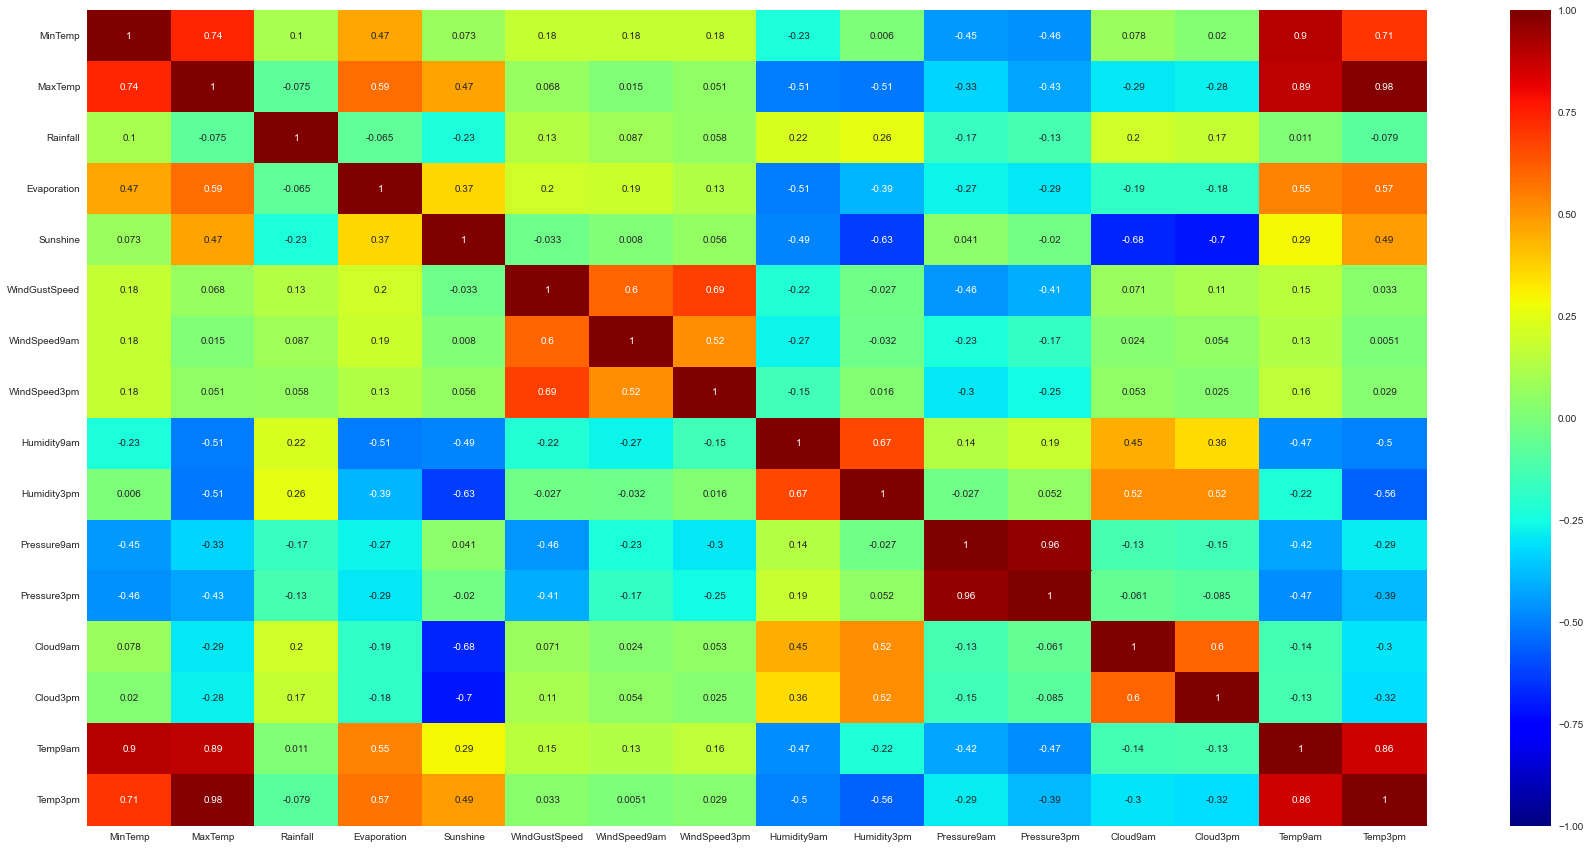

In [20]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(30,15))   
sns.heatmap(data.corr(), vmin = -1, vmax = 1,annot=True,cmap='jet')

In [21]:
print(data['WindDir9am'].unique())
print(data['WindGustDir'].unique())    

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']


In [22]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
print('WindGustDir',' : ', data['WindGustDir'].isna().sum())  
print('WindDir9am',' : ', data['WindDir9am'].isna().sum())  
print('WindDir3pm',' : ', data['WindDir3pm'].isna().sum())  


WindGustDir  :  9330
WindDir9am  :  10013
WindDir3pm  :  3778


In [24]:
data =data.dropna(subset=['WindGustDir'])
data =data.dropna(subset=['WindDir9am'])
data =data.dropna(subset=['WindDir3pm'])
print('WindGustDir',' : ', data['WindGustDir'].isna().sum())  
print('WindDir9am',' : ', data['WindDir9am'].isna().sum())  
print('WindDir3pm',' : ', data['WindDir3pm'].isna().sum())  

WindGustDir  :  0
WindDir9am  :  0
WindDir3pm  :  0


In [25]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124528 non-null  float64
 2   MaxTemp        124620 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    73268 non-null   float64
 5   Sunshine       67433 non-null   float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    123636 non-null  float64
 13  Humidity3pm    123130 non-null  float64
 14  Pressure9am    115508 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

In [27]:
data['Evaporation'].isna().sum()

51400

In [28]:
data['Evaporation'].mean()

5.606511710432931

In [29]:
data['Evaporation'].median()

4.8

In [30]:
data['Evaporation'].max()

86.2

In [31]:
data['Evaporation'].min()

0.0

<AxesSubplot:xlabel='Evaporation'>

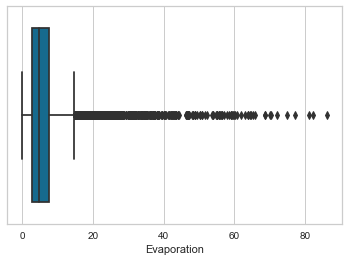

In [32]:
sns.boxplot(x=data["Evaporation"])

In [33]:
median_value_Evaporation =data['Evaporation'].median()
median_value_Evaporation

4.8

In [34]:
data['Evaporation'].fillna(value=median_value_Evaporation, inplace=True)

<AxesSubplot:xlabel='Evaporation'>

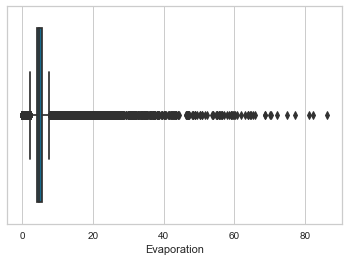

In [35]:
sns.boxplot(x=data["Evaporation"])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124528 non-null  float64
 2   MaxTemp        124620 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       67433 non-null   float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    123636 non-null  float64
 13  Humidity3pm    123130 non-null  float64
 14  Pressure9am    115508 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

In [37]:
data['Sunshine'].isna().sum()

57235

In [38]:
data['Sunshine'].mean()

7.712142422849346

In [39]:
data['Sunshine'].median()

8.6

<AxesSubplot:xlabel='Sunshine'>

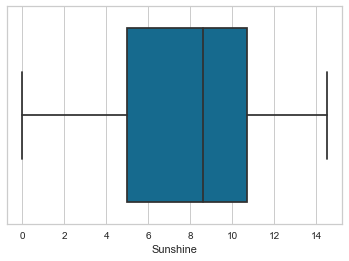

In [40]:
sns.boxplot(x=data["Sunshine"])

In [41]:
median_value_Sunshine =data['Sunshine'].median()
median_value_Sunshine

8.6

In [42]:
data['Sunshine'].fillna(value=median_value_Sunshine, inplace=True)

<AxesSubplot:xlabel='Sunshine'>

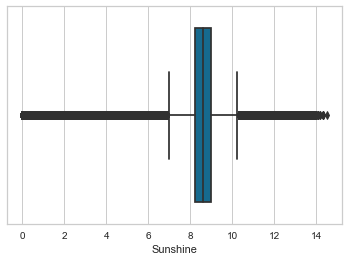

In [43]:
sns.boxplot(x=data["Sunshine"])

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124528 non-null  float64
 2   MaxTemp        124620 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    123636 non-null  float64
 13  Humidity3pm    123130 non-null  float64
 14  Pressure9am    115508 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

In [45]:
data['Humidity9am'].isna().sum()

1032

In [46]:
data['Humidity9am'].mean()

67.67390565854605

In [47]:
data['Humidity9am'].median()

69.0

<AxesSubplot:xlabel='Humidity9am'>

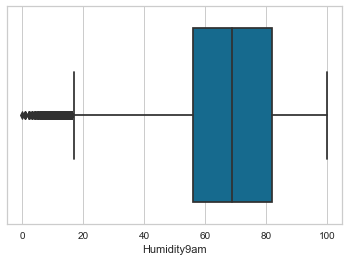

In [48]:
sns.boxplot(x=data["Humidity9am"])

In [49]:
median_value_Humidity9am =data['Humidity9am'].median()
median_value_Humidity9am

69.0

In [50]:
data['Humidity9am'].fillna(value=median_value_Humidity9am, inplace=True)

<AxesSubplot:xlabel='Humidity9am'>

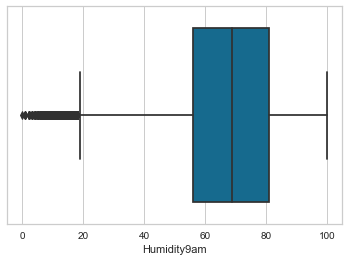

In [51]:
sns.boxplot(x=data["Humidity9am"])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124528 non-null  float64
 2   MaxTemp        124620 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    123130 non-null  float64
 14  Pressure9am    115508 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='Humidity3pm'>

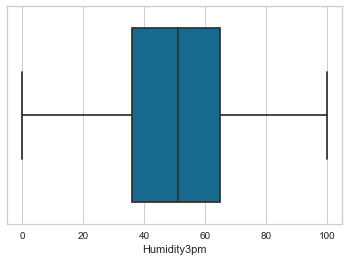

In [53]:
sns.boxplot(x=data["Humidity3pm"])

In [54]:
median_value_Humidity3pm = data['Humidity3pm'].median()
median_value_Humidity3pm

51.0

In [55]:
data['Humidity3pm'].fillna(value=median_value_Humidity3pm, inplace=True)

<AxesSubplot:xlabel='Humidity3pm'>

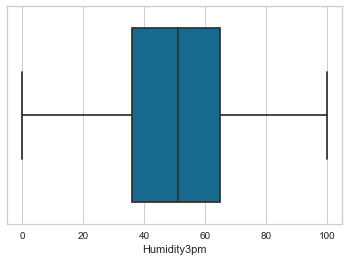

In [56]:
sns.boxplot(x=data["Humidity3pm"])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124528 non-null  float64
 2   MaxTemp        124620 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    115508 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='Pressure9am'>

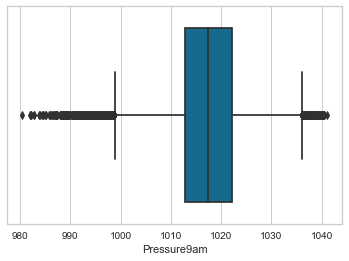

In [58]:
sns.boxplot(x=data["Pressure9am"])

In [59]:
median_value_Pressure9am = data['Pressure9am'].median()
median_value_Pressure9am

1017.4

In [60]:
data['Pressure9am'].fillna(value=median_value_Pressure9am, inplace=True)

<AxesSubplot:xlabel='Pressure9am'>

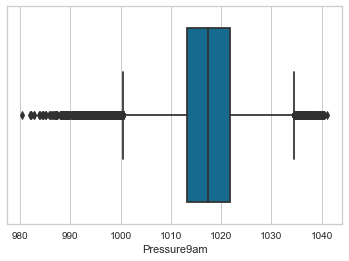

In [61]:
sns.boxplot(x=data["Pressure9am"])

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124528 non-null  float64
 2   MaxTemp        124620 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='MinTemp'>

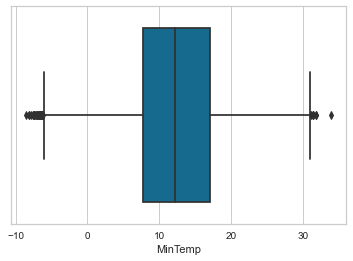

In [63]:
sns.boxplot(x=data["MinTemp"])

In [64]:
median_value_MinTemp = data['MinTemp'].median()
median_value_MinTemp

12.2

In [65]:
data['MinTemp'].fillna(value=median_value_MinTemp, inplace=True)

<AxesSubplot:xlabel='MinTemp'>

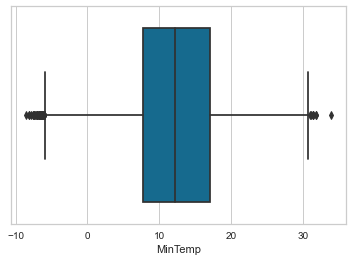

In [66]:
sns.boxplot(x=data["MinTemp"])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124620 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='MaxTemp'>

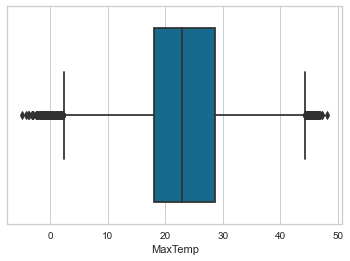

In [68]:
sns.boxplot(x=data["MaxTemp"])

In [69]:
median_value_MaxTemp = data['MaxTemp'].median()
median_value_MaxTemp

23.0

In [70]:
data['MaxTemp'].fillna(value=median_value_MaxTemp, inplace=True)

<AxesSubplot:xlabel='MaxTemp'>

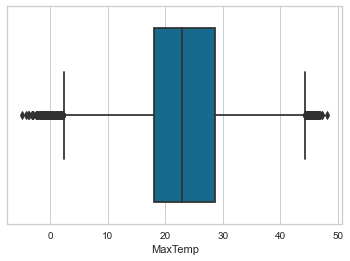

In [71]:
sns.boxplot(x=data["MaxTemp"])

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='Rainfall'>

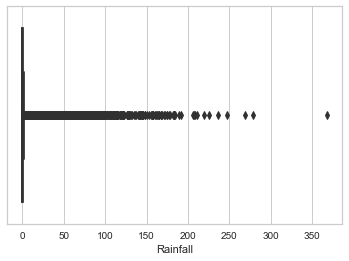

In [73]:
sns.boxplot(x=data["Rainfall"])

In [74]:
median_value_Rainfall = data['Rainfall'].median()
median_value_Rainfall

0.0

In [75]:
data['Rainfall'].fillna(value=median_value_Rainfall, inplace=True)

<AxesSubplot:xlabel='Rainfall'>

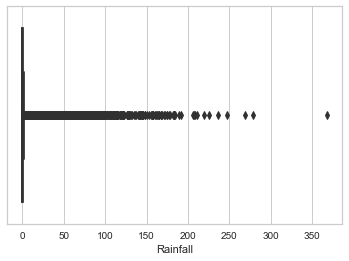

In [76]:
sns.boxplot(x=data["Rainfall"])

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       124668 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    115558 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='Pressure3pm'>

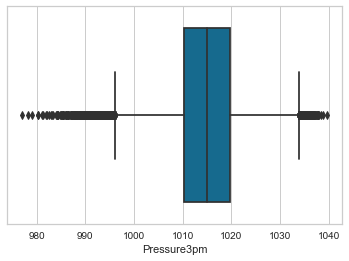

In [78]:
sns.boxplot(x=data["Pressure3pm"])

In [79]:
median_value_Pressure3pm = data['Pressure3pm'].median()
median_value_Pressure3pm

1015.0

In [80]:
data['Pressure3pm'].fillna(value=median_value_Pressure3pm, inplace=True)


<AxesSubplot:xlabel='Pressure3pm'>

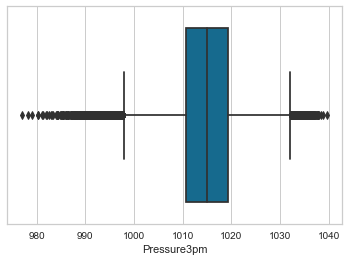

In [81]:
sns.boxplot(x=data["Pressure3pm"])

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       124668 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    124668 non-null  float64
 16  Cloud9am       77803 non-null   float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='Cloud9am'>

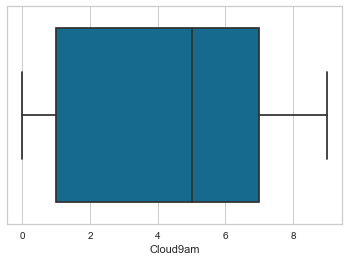

In [83]:
sns.boxplot(x=data["Cloud9am"])

In [84]:
median_value_Cloud9am = data['Cloud9am'].median()
median_value_Cloud9am

5.0

In [85]:
data['Cloud9am'].fillna(value=median_value_Cloud9am, inplace=True)

<AxesSubplot:xlabel='Cloud9am'>

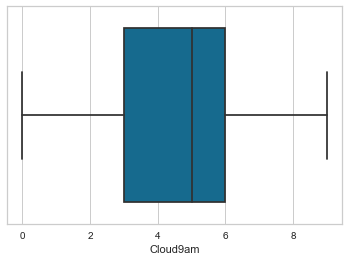

In [86]:
sns.boxplot(x=data["Cloud9am"])

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       124668 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    124668 non-null  float64
 16  Cloud9am       124668 non-null  float64
 17  Cloud3pm       75827 non-null

<AxesSubplot:xlabel='Cloud3pm'>

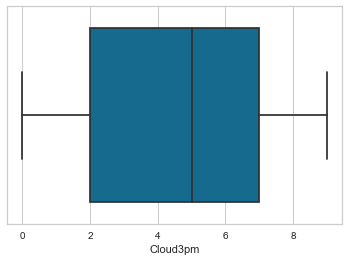

In [88]:
sns.boxplot(x=data["Cloud3pm"])

In [89]:
median_value_Cloud3pm = data['Cloud3pm'].median()
median_value_Cloud3pm

5.0

In [90]:
data['Cloud3pm'].fillna(value=median_value_Cloud3pm, inplace=True)


<AxesSubplot:xlabel='Cloud3pm'>

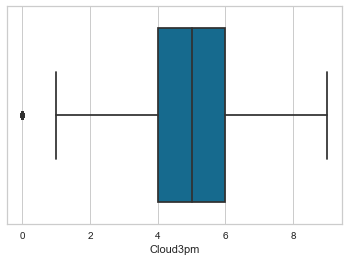

In [91]:

sns.boxplot(x=data["Cloud3pm"])


In [92]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       124668 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    124668 non-null  float64
 16  Cloud9am       124668 non-null  float64
 17  Cloud3pm       124668 non-nul

<AxesSubplot:xlabel='Temp9am'>

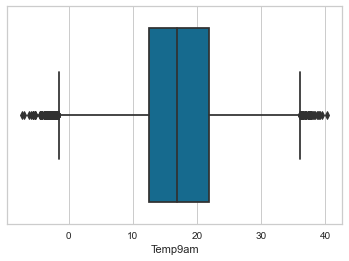

In [93]:
sns.boxplot(x=data["Temp9am"])

In [94]:
median_value_Temp9am = data['Temp9am'].median()
median_value_Temp9am

16.9

In [95]:
data['Temp9am'].fillna(value=median_value_Temp9am, inplace=True)


<AxesSubplot:xlabel='Temp9am'>

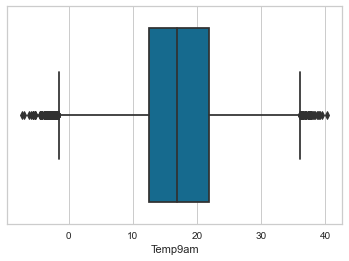

In [96]:
sns.boxplot(x=data["Temp9am"])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       124668 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    124668 non-null  float64
 16  Cloud9am       124668 non-null  float64
 17  Cloud3pm       124668 non-nul

<AxesSubplot:xlabel='Temp3pm'>

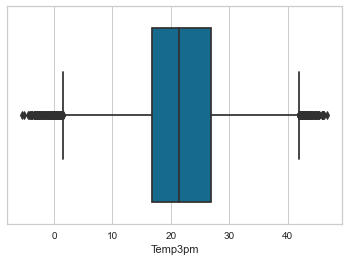

In [98]:
sns.boxplot(x=data["Temp3pm"])

In [99]:
median_value_Temp3pm = data['Temp3pm'].median()
median_value_Temp3pm

21.4

In [100]:
data['Temp3pm'].fillna(value=median_value_Temp3pm, inplace=True)


<AxesSubplot:xlabel='Temp3pm'>

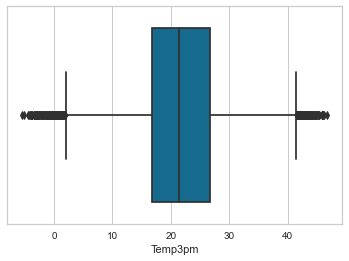

In [101]:
sns.boxplot(x=data["Temp3pm"])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       124668 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    124668 non-null  float64
 16  Cloud9am       124668 non-null  float64
 17  Cloud3pm       124668 non-nul

In [103]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [104]:
#data['RainToday'] = data['RainToday'].map(
                   #{'Yes':1 ,'No':0})


In [105]:
#data['RainTomorrow'] = data['RainTomorrow'].map(
                  # {'Yes':1 ,'No':0})

In [106]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,8.6,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,4.8,8.6,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,4.8,8.6,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,4.8,8.6,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124668 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124668 non-null  object 
 1   MinTemp        124668 non-null  float64
 2   MaxTemp        124668 non-null  float64
 3   Rainfall       124668 non-null  float64
 4   Evaporation    124668 non-null  float64
 5   Sunshine       124668 non-null  float64
 6   WindGustDir    124668 non-null  object 
 7   WindGustSpeed  124668 non-null  float64
 8   WindDir9am     124668 non-null  object 
 9   WindDir3pm     124668 non-null  object 
 10  WindSpeed9am   124668 non-null  float64
 11  WindSpeed3pm   124668 non-null  float64
 12  Humidity9am    124668 non-null  float64
 13  Humidity3pm    124668 non-null  float64
 14  Pressure9am    124668 non-null  float64
 15  Pressure3pm    124668 non-null  float64
 16  Cloud9am       124668 non-null  float64
 17  Cloud3pm       124668 non-nul

In [108]:
print('RainToday',' : ', data['RainToday'].isna().sum())  
print('RainTomorrow',' : ', data['RainTomorrow'].isna().sum())  

RainToday  :  958
RainTomorrow  :  0


In [109]:
data =data.dropna(subset=['RainToday'])
data =data.dropna(subset=['RainTomorrow'])


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  object 
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  object 
 9   WindDir3pm     123710 non-null  object 
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

In [111]:
#data['MinTemp'].isna().sum()

In [112]:
#data =data.dropna(subset=['MinTemp'])

In [113]:
#data['MaxTemp'].isna().sum()


In [114]:
#data =data.dropna(subset=['MaxTemp'])

In [115]:
#data.info()

In [116]:
#data['Rainfall'].isna().sum()


In [117]:
#data =data.dropna(subset=['Rainfall'])

In [118]:
#data.info()

In [119]:
#data['Humidity9am'].isna().sum()

In [120]:
#data =data.dropna(subset=['Humidity9am'])

In [121]:
#data['Humidity3pm'].isna().sum()


In [122]:
#data =data.dropna(subset=['Humidity3pm'])

In [123]:
#data['Pressure9am'].isna().sum()

In [124]:
#weetviz_report = sv.analyze(data)

#analyzing the dataset
#sweetviz_report = sv.analyze(data, target_feat = 'RainTomorrow')

#display the report
#sweetviz_report.show_html('AUS_Rain.html')

In [125]:
#found this in the internet
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    data[c1]= label_encoder.fit_transform(data[c1].astype(str))
 
    data[c1].unique()
    return data

In [126]:
LABEL_ENCODING('Location')


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,1,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,1,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,1,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,1,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,4.8,8.6,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,39,2.8,23.4,0.0,4.8,8.6,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,39,3.6,25.3,0.0,4.8,8.6,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,39,5.4,26.9,0.0,4.8,8.6,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [127]:
LABEL_ENCODING('WindGustDir')


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.6,13,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,1,7.4,25.1,0.0,4.8,8.6,14,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,1,12.9,25.7,0.0,4.8,8.6,15,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,1,9.2,28.0,0.0,4.8,8.6,4,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,1,17.5,32.3,1.0,4.8,8.6,13,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,4.8,8.6,0,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,39,2.8,23.4,0.0,4.8,8.6,0,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,39,3.6,25.3,0.0,4.8,8.6,6,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,39,5.4,26.9,0.0,4.8,8.6,3,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [128]:
LABEL_ENCODING('RainToday')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.6,13,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,No
1,1,7.4,25.1,0.0,4.8,8.6,14,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,No
2,1,12.9,25.7,0.0,4.8,8.6,15,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,No
3,1,9.2,28.0,0.0,4.8,8.6,4,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,No
4,1,17.5,32.3,1.0,4.8,8.6,13,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,4.8,8.6,0,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,No
145455,39,2.8,23.4,0.0,4.8,8.6,0,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,No
145456,39,3.6,25.3,0.0,4.8,8.6,6,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,No
145457,39,5.4,26.9,0.0,4.8,8.6,3,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,No


In [129]:
LABEL_ENCODING('RainTomorrow')


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.6,13,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,7.4,25.1,0.0,4.8,8.6,14,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1,12.9,25.7,0.0,4.8,8.6,15,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4.8,8.6,4,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,1,17.5,32.3,1.0,4.8,8.6,13,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,4.8,8.6,0,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,39,2.8,23.4,0.0,4.8,8.6,0,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,39,3.6,25.3,0.0,4.8,8.6,6,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,39,5.4,26.9,0.0,4.8,8.6,3,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


In [130]:
LABEL_ENCODING('WindDir9am')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.6,13,44.0,13,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,7.4,25.1,0.0,4.8,8.6,14,44.0,6,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1,12.9,25.7,0.0,4.8,8.6,15,46.0,13,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4.8,8.6,4,24.0,9,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,1,17.5,32.3,1.0,4.8,8.6,13,41.0,1,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,4.8,8.6,0,31.0,2,E,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,39,2.8,23.4,0.0,4.8,8.6,0,31.0,9,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,39,3.6,25.3,0.0,4.8,8.6,6,22.0,9,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,39,5.4,26.9,0.0,4.8,8.6,3,37.0,9,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


In [131]:
LABEL_ENCODING('WindDir3pm')



,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,7.4,25.1,0.0,4.8,8.6,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1,12.9,25.7,0.0,4.8,8.6,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4.8,8.6,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,1,17.5,32.3,1.0,4.8,8.6,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,4.8,8.6,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,39,2.8,23.4,0.0,4.8,8.6,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,39,3.6,25.3,0.0,4.8,8.6,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,39,5.4,26.9,0.0,4.8,8.6,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


In [132]:
data.isnull().sum()



Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [133]:
data.groupby("RainTomorrow")['RainTomorrow'].count()

RainTomorrow
0    96318
1    27392
Name: RainTomorrow, dtype: int64

In [134]:
print(27392+96318)
print((27392/123710)*100)


123710
22.14210653948751


In [135]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)



StandardScaler()

In [136]:
feature=data.drop(['RainTomorrow'],axis=1)

In [137]:
feature

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.9,0.6,4.8,8.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,1,7.4,25.1,0.0,4.8,8.6,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,1,12.9,25.7,0.0,4.8,8.6,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,1,9.2,28.0,0.0,4.8,8.6,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,1,17.5,32.3,1.0,4.8,8.6,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,39,3.5,21.8,0.0,4.8,8.6,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0
145455,39,2.8,23.4,0.0,4.8,8.6,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0
145456,39,3.6,25.3,0.0,4.8,8.6,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0
145457,39,5.4,26.9,0.0,4.8,8.6,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0


In [138]:
#traget
label=data['RainTomorrow']

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,label,test_size=.25)

In [140]:
import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 3, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 

X_train_resampled, y_train_resampled = ROS.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

0    72195
1    61761
Name: RainTomorrow, dtype: int64

In [141]:


print('TRAIN SHAPE : ',X_train.shape,y_train.shape)
print('TEST SHAPE : ',X_test.shape,y_test.shape)


TRAIN SHAPE :  (92782, 21) (92782,)
TEST SHAPE :  (30928, 21) (30928,)


In [142]:
print('RESAMPLED TRAIN SHAPE : ',X_train_resampled.shape, y_train_resampled.shape )


RESAMPLED TRAIN SHAPE :  (133956, 21) (133956,)


In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred


array([0, 0, 0, ..., 0, 0, 1])

In [144]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     24123
           1       0.65      0.52      0.58      6805

    accuracy                           0.83     30928
   macro avg       0.76      0.72      0.74     30928
weighted avg       0.82      0.83      0.83     30928



In [145]:
#found this in the internet
cmat = confusion_matrix(y_test,pred)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 22225
FP - False Positive 1898
FN - False Negative 3276
TP - True Positive 3529
Accuracy Rate: 0.8327082255561303
Misclassification Rate: 0.16729177444386964


In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled,y_train_resampled)
pred = knn.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 1])

In [147]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))



              precision    recall  f1-score   support

           0       0.90      0.82      0.86     24123
           1       0.51      0.67      0.58      6805

    accuracy                           0.78     30928
   macro avg       0.70      0.74      0.72     30928
weighted avg       0.81      0.78      0.79     30928



In [148]:
#found this in the internet
cmat = confusion_matrix(y_test,pred)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 19728
FP - False Positive 4395
FN - False Negative 2261
TP - True Positive 4544
Accuracy Rate: 0.784790481117434
Misclassification Rate: 0.21520951888256595


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
lr = LogisticRegression(solver='liblinear') 
lr.fit(X_train, y_train)
print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr.predict(X_test)), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))) 



Simple Logistic Regression; Test F1: 0.593, Test AUC: 0.868


In [150]:
lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_train_resampled, y_train_resampled)

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_os.predict(X_test)), roc_auc_score(y_test, lr_os.predict_proba(X_test)[:,1])))


Logistic Regression on Oversampled Train Data; Test F1: 0.628, Test AUC: 0.868


In [151]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_train_smote, y_train_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_smote.predict(X_test)), roc_auc_score(y_test, lr_smote.predict_proba(X_test)[:,1])))

Logistic Regression on SMOTE Train Data; Test F1: 0.626, Test AUC: 0.866


In [152]:
lr = LogisticRegression(solver='liblinear') 
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={1 : 4, 0 : 1}, solver='liblinear')

lr.fit(X_train, y_train)
print('Normal Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr.predict(X_test)), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))

lr_balanced.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1])))

lr_4x.fit(X_train, y_train)
print('4:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test)), roc_auc_score(y_test, lr_4x.predict_proba(X_test)[:,1])))

Normal Logistic Regression Test F1: 0.593, Test AUC: 0.868
Balanced class weights Logistic Regression Test F1: 0.624, Test AUC: 0.870
4:1 class weights Logistic Regression Test F1: 0.615, Test AUC: 0.868


Logistic Regression Model best F1 score 0.634 at prob decision threshold >= 0.304


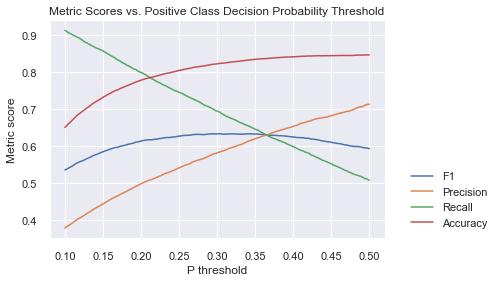

In [153]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [154]:
decisiontree = DecisionTreeClassifier(max_depth=5)
decisiontree.fit(X_train, y_train)
decisiontree.score(X_test, y_test)

0.8405975168132437

In [155]:
#with resampled data
decisiontree = DecisionTreeClassifier(max_depth=5)
decisiontree.fit(X_train_resampled, y_train_resampled)
decisiontree.score(X_test, y_test)

0.7701112260734609

In [156]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)
randomforest.score(X_test, y_test)

0.8594800827728919

In [157]:
#with resampled data
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train_resampled, y_train_resampled)
randomforest.score(X_test, y_test)

0.8576370926021728

In [161]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [162]:
from pycaret.classification import *
setup_1 = setup(data = data, target = 'RainTomorrow', session_id=123) 

,Description,Value
0,session_id,123
1,Target,RainTomorrow
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(123710, 22)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [163]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8627,0.8959,0.5716,0.7496,0.6485,0.5651,0.5732,3.8290
lightgbm,Light Gradient Boosting Machine,0.8618,0.8945,0.5565,0.7557,0.6409,0.5578,0.5678,0.7880
rf,Random Forest Classifier,0.8598,0.8899,0.5250,0.7693,0.6240,0.5416,0.5566,5.0880
et,Extra Trees Classifier,0.8585,0.8908,0.5064,0.7778,0.6133,0.5314,0.5498,3.9310
gbc,Gradient Boosting Classifier,0.8542,0.8810,0.5203,0.7453,0.6127,0.5264,0.5394,7.0000
lda,Linear Discriminant Analysis,0.8475,0.8713,0.5202,0.7142,0.6019,0.5105,0.5203,0.1390
ada,Ada Boost Classifier,0.8474,0.8701,0.5119,0.7186,0.5979,0.5070,0.5181,1.6820
lr,Logistic Regression,0.8468,0.8688,0.4998,0.7234,0.5911,0.5007,0.5137,3.0780
ridge,Ridge Classifier,0.8464,0.0000,0.4558,0.7541,0.5681,0.4816,0.5042,0.0710
knn,K Neighbors Classifier,0.8427,0.8300,0.5129,0.6973,0.5910,0.4964,0.5054,9.4140


In [ ]:
#from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
#knn = KNeighborsClassifier(n_neighbors=5)
#scores = cross_val_score(knn, feature, label, cv=10, scoring='accuracy')
#print(scores)

In [ ]:
# use average accuracy as an estimate of out-of-sample accuracy
#print(scores.mean())

In [ ]:
# search for an optimal value of K for KNN
#k_range = list(range(1, 31))
#k_scores = []
#for k in k_range:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    scores = cross_val_score(knn, feature, label, cv=10, scoring='accuracy')
#   k_scores.append(scores.mean())
#print(k_scores)

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#
## plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
#plt.plot(k_range, k_scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy')